In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd '/content/drive/MyDrive/Biodata Analysis/'

/content/drive/MyDrive/Biodata Analysis


In [ ]:
! pip install kaggle
!mkdir -p ~/.kaggle
!cp '/content/drive/MyDrive/Biodata Analysis/kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
########### get info csv
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f tdcsfog_metadata.csv
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f defog_metadata.csv
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f daily_metadata.csv
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f events.csv
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f tasks.csv
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f subjects.csv
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f sample_submission.csv

In [ ]:
import pandas as pd
tdcsfog_metadata = pd.read_csv('./tdcsfog_metadata.csv')
defog_metadata = pd.read_csv('./defog_metadata.csv')
daily_metadata = pd.read_csv('./daily_metadata.csv')
subjects = pd.read_csv('./subjects.csv')
tasks = pd.read_csv('./tasks.csv')
events = pd.read_csv('./tasks.csv')

In [ ]:
tdcsfog_metadata

,Id,Subject,Visit,Test,Medication
0,003f117e14,4dc2f8,3,2,on
1,009ee11563,f62eec,4,2,on
2,011322847a,231c3b,2,2,on
3,01d0fe7266,231c3b,2,1,off
4,024418ba39,fa8764,19,3,on
...,...,...,...,...,...
828,feba449e1a,312788,19,1,on
829,ff4f844fd3,af82b2,2,3,on
830,ff53514514,3b2403,2,3,on
831,ff92d9244d,2d57c2,20,2,on


In [ ]:
defog_metadata

,Id,Subject,Visit,Medication
0,02ab235146,e1f62e,2,on
1,02ea782681,ae2d35,2,on
2,06414383cf,8c1f5e,2,off
3,092b4c1819,2874c5,1,off
4,0a900ed8a2,0e3d49,2,on
...,...,...,...,...
132,f3a921edee,1a778d,1,off
133,f40e8c6ebe,575c60,1,off
134,f8ddbdd98d,107712,1,on
135,f9efef91fb,5d9cae,2,off


In [ ]:
tdcsfog_metadata['Type'] = 'tdcsfog'
defog_metadata['Type'] = 'defog'
metadata = pd.concat([tdcsfog_metadata, defog_metadata])
metadata['Medication'] = metadata['Medication'].factorize()[0] # on medication = 0 off medication =1
metadata

,Id,Subject,Visit,Test,Medication,Type
0,003f117e14,4dc2f8,3,2.0,0,tdcsfog
1,009ee11563,f62eec,4,2.0,0,tdcsfog
2,011322847a,231c3b,2,2.0,0,tdcsfog
3,01d0fe7266,231c3b,2,1.0,1,tdcsfog
4,024418ba39,fa8764,19,3.0,0,tdcsfog
...,...,...,...,...,...,...
132,f3a921edee,1a778d,1,NaN,1,defog
133,f40e8c6ebe,575c60,1,NaN,1,defog
134,f8ddbdd98d,107712,1,NaN,0,defog
135,f9efef91fb,5d9cae,2,NaN,1,defog


In [ ]:
################################################################

In [ ]:
daily_metadata # not important info just the time of recording

,Id,Subject,Visit,Beginning of recording [00:00-23:59]
0,00c4c9313d,fba3a3,1,10:19
1,07a96f89ec,7da72f,1,07:30
2,0d1bc672a8,056372,2,08:30
3,0e333c9833,b4bd22,1,11:30
4,164adaed7b,9f72eb,1,13:00
...,...,...,...,...
60,e658b0aa3d,0e3d49,1,08:00
61,ed0a487f20,9404ad,1,12:30
62,ef1db3ca64,12f8d1,1,08:00
63,f16c5cda55,2874c5,1,08:30


In [ ]:
################################################################

In [ ]:
subjects

,Subject,Visit,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,00f674,2.0,63,M,27.0,43.0,49.0,24
1,00f674,1.0,63,M,27.0,31.0,30.0,26
2,02bc69,NaN,69,M,4.0,21.0,NaN,22
3,040587,2.0,75,M,26.0,52.0,69.0,21
4,040587,1.0,75,M,26.0,47.0,75.0,24
...,...,...,...,...,...,...,...,...
168,f80507,1.0,57,M,2.0,12.0,NaN,0
169,fa8764,NaN,60,F,7.0,30.0,NaN,19
170,fba3a3,1.0,65,F,8.0,28.0,NaN,0
171,fcb9f5,1.0,69,M,3.5,27.0,49.0,23


In [ ]:
subjects['Sex'] = subjects['Sex'].factorize()[0] #Males=0,Females=1
subjects = subjects.fillna(0).groupby('Subject').median() #fill NA with 0 and grouped and median (we can change those)
subjects

,Visit,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
Subject,,,,,,,
00f674,1.5,63.0,0.0,27.0,37.0,39.5,25.0
02bc69,0.0,69.0,0.0,4.0,21.0,0.0,22.0
040587,1.5,75.0,0.0,26.0,49.5,72.0,22.5
056372,2.0,69.0,0.0,13.0,44.0,50.0,22.0
07285e,0.0,58.0,0.0,1.0,18.0,26.0,10.0
...,...,...,...,...,...,...,...
f686f0,0.0,61.0,0.0,7.0,44.0,0.0,24.0
f80507,1.0,57.0,0.0,2.0,12.0,0.0,0.0
fa8764,0.0,60.0,1.0,7.0,30.0,0.0,19.0


In [ ]:
#############################################################################

In [ ]:
tasks # events same as tasks

,Id,4MW,4MW-C,Hotspot1,Hotspot1-C,Hotspot2,Hotspot2-C,MB1,MB10,MB11,...,MB8,MB9,Rest1,Rest2,TUG-C,TUG-DT,TUG-ST,Turning-C,Turning-DT,Turning-ST
0,02ab235146,16.520,16.680,16.760,16.240,53.920,64.600,13.960,17.960,17.400,...,12.840,30.800,180.48,60.32,38.440,47.920,36.240,21.920,46.400,23.320
1,02ea782681,11.618,11.796,11.525,11.692,8.329,9.032,3.469,6.624,6.230,...,11.849,30.650,0.00,0.00,18.343,19.932,20.130,18.042,21.588,18.698
2,06414383cf,24.860,41.584,25.885,0.000,38.642,0.000,0.000,0.000,0.000,...,0.000,0.000,0.00,0.00,0.000,44.832,33.867,0.000,83.837,124.299
3,092b4c1819,13.664,0.000,15.409,0.000,34.834,0.000,0.000,0.000,0.000,...,0.000,0.000,0.00,0.00,0.000,30.166,23.347,0.000,45.025,39.351
4,0a900ed8a2,11.720,11.840,10.600,10.720,43.171,41.160,1.760,21.040,10.560,...,31.040,30.520,180.88,60.32,18.083,25.000,19.920,18.699,18.200,16.880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,f3a921edee,16.722,0.000,16.383,0.000,76.200,0.000,0.000,0.000,0.000,...,0.000,0.000,0.00,0.00,0.000,29.043,29.820,0.000,136.840,76.960
133,f40e8c6ebe,12.867,0.000,27.906,0.000,152.333,0.000,0.000,0.000,0.000,...,0.000,0.000,0.00,0.00,0.000,36.805,28.232,0.000,98.579,69.889
134,f8ddbdd98d,23.787,0.000,32.556,0.000,38.557,0.000,6.347,10.356,10.655,...,0.000,33.289,0.00,0.00,0.000,44.132,54.993,0.000,100.433,72.152
135,f9efef91fb,16.351,17.552,16.155,15.166,67.059,51.715,0.000,0.000,0.000,...,0.000,0.000,0.00,0.00,23.483,23.541,22.137,36.898,38.632,30.831


In [ ]:
tasks['Duration'] = tasks['End'] - tasks['Begin']
tasks = pd.pivot_table(tasks, values=['Duration'], index=['Id'], columns=['Task'], aggfunc='sum', fill_value=0)
tasks.columns = [c[1] for c in tasks.columns]
tasks = tasks.reset_index()
tasks

,Id,4MW,4MW-C,Hotspot1,Hotspot1-C,Hotspot2,Hotspot2-C,MB1,MB10,MB11,...,MB8,MB9,Rest1,Rest2,TUG-C,TUG-DT,TUG-ST,Turning-C,Turning-DT,Turning-ST
0,02ab235146,16.520,16.680,16.760,16.240,53.920,64.600,13.960,17.960,17.400,...,12.840,30.800,180.48,60.32,38.440,47.920,36.240,21.920,46.400,23.320
1,02ea782681,11.618,11.796,11.525,11.692,8.329,9.032,3.469,6.624,6.230,...,11.849,30.650,0.00,0.00,18.343,19.932,20.130,18.042,21.588,18.698
2,06414383cf,24.860,41.584,25.885,0.000,38.642,0.000,0.000,0.000,0.000,...,0.000,0.000,0.00,0.00,0.000,44.832,33.867,0.000,83.837,124.299
3,092b4c1819,13.664,0.000,15.409,0.000,34.834,0.000,0.000,0.000,0.000,...,0.000,0.000,0.00,0.00,0.000,30.166,23.347,0.000,45.025,39.351
4,0a900ed8a2,11.720,11.840,10.600,10.720,43.171,41.160,1.760,21.040,10.560,...,31.040,30.520,180.88,60.32,18.083,25.000,19.920,18.699,18.200,16.880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,f3a921edee,16.722,0.000,16.383,0.000,76.200,0.000,0.000,0.000,0.000,...,0.000,0.000,0.00,0.00,0.000,29.043,29.820,0.000,136.840,76.960
133,f40e8c6ebe,12.867,0.000,27.906,0.000,152.333,0.000,0.000,0.000,0.000,...,0.000,0.000,0.00,0.00,0.000,36.805,28.232,0.000,98.579,69.889
134,f8ddbdd98d,23.787,0.000,32.556,0.000,38.557,0.000,6.347,10.356,10.655,...,0.000,33.289,0.00,0.00,0.000,44.132,54.993,0.000,100.433,72.152
135,f9efef91fb,16.351,17.552,16.155,15.166,67.059,51.715,0.000,0.000,0.000,...,0.000,0.000,0.00,0.00,23.483,23.541,22.137,36.898,38.632,30.831


In [ ]:
################################################################33

In [ ]:
metadata_join_subjects = metadata.merge(subjects, how='left', on='Subject').copy()
metadata_join_subjects

,Id,Subject,Visit_x,Test,Medication,Type,Visit_y,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,003f117e14,4dc2f8,3,2.0,0,tdcsfog,0.0,68.0,1.0,9.0,17.0,15.0,15.0
1,009ee11563,f62eec,4,2.0,0,tdcsfog,0.0,71.0,0.0,10.0,42.0,0.0,24.0
2,011322847a,231c3b,2,2.0,0,tdcsfog,0.0,67.0,0.0,12.0,27.0,28.0,19.0
3,01d0fe7266,231c3b,2,1.0,1,tdcsfog,0.0,67.0,0.0,12.0,27.0,28.0,19.0
4,024418ba39,fa8764,19,3.0,0,tdcsfog,0.0,60.0,1.0,7.0,30.0,0.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,f3a921edee,1a778d,1,NaN,1,defog,1.5,65.0,0.0,7.0,50.0,59.5,24.5
966,f40e8c6ebe,575c60,1,NaN,1,defog,1.0,28.0,0.0,4.0,54.0,50.0,25.0
967,f8ddbdd98d,107712,1,NaN,0,defog,1.0,82.0,1.0,11.0,38.0,42.0,21.0
968,f9efef91fb,5d9cae,2,NaN,1,defog,1.5,72.0,0.5,14.0,22.5,39.0,16.0


In [ ]:
#######################################

In [ ]:
metadata_join_subjects_join_tasks = metadata_join_subjects.merge(tasks, how='left', on='Id').copy() # Tasks only for defog so this is not to
                                                                                                    # usefull
metadata_join_subjects_join_tasks

,Id,Subject,Visit_x,Test,Medication,Type,Visit_y,Age,Sex,YearsSinceDx,...,MB8,MB9,Rest1,Rest2,TUG-C,TUG-DT,TUG-ST,Turning-C,Turning-DT,Turning-ST
0,003f117e14,4dc2f8,3,2.0,0,tdcsfog,0.0,68.0,1.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,009ee11563,f62eec,4,2.0,0,tdcsfog,0.0,71.0,0.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,011322847a,231c3b,2,2.0,0,tdcsfog,0.0,67.0,0.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01d0fe7266,231c3b,2,1.0,1,tdcsfog,0.0,67.0,0.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,024418ba39,fa8764,19,3.0,0,tdcsfog,0.0,60.0,1.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,f3a921edee,1a778d,1,NaN,1,defog,1.5,65.0,0.0,7.0,...,0.000,0.000,0.0,0.0,0.000,29.043,29.820,0.000,136.840,76.960
966,f40e8c6ebe,575c60,1,NaN,1,defog,1.0,28.0,0.0,4.0,...,0.000,0.000,0.0,0.0,0.000,36.805,28.232,0.000,98.579,69.889
967,f8ddbdd98d,107712,1,NaN,0,defog,1.0,82.0,1.0,11.0,...,0.000,33.289,0.0,0.0,0.000,44.132,54.993,0.000,100.433,72.152
968,f9efef91fb,5d9cae,2,NaN,1,defog,1.5,72.0,0.5,14.0,...,0.000,0.000,0.0,0.0,23.483,23.541,22.137,36.898,38.632,30.831


In [ ]:
########################################## or defog and tdcfog separetly

In [ ]:
tdcsfog_metadata['Medication'] = tdcsfog_metadata['Medication'].factorize()[0]
tdcsfog_metadata_join_subjects = tdcsfog_metadata.merge(subjects, how='left', on='Subject').copy()
tdcsfog_metadata_join_subjects

,Id,Subject,Visit_x,Test,Medication,Type,Visit_y,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,003f117e14,4dc2f8,3,2,0,tdcsfog,0.0,68.0,1.0,9.0,17.0,15.0,15.0
1,009ee11563,f62eec,4,2,0,tdcsfog,0.0,71.0,0.0,10.0,42.0,0.0,24.0
2,011322847a,231c3b,2,2,0,tdcsfog,0.0,67.0,0.0,12.0,27.0,28.0,19.0
3,01d0fe7266,231c3b,2,1,1,tdcsfog,0.0,67.0,0.0,12.0,27.0,28.0,19.0
4,024418ba39,fa8764,19,3,0,tdcsfog,0.0,60.0,1.0,7.0,30.0,0.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,feba449e1a,312788,19,1,0,tdcsfog,0.0,79.0,1.0,6.0,44.0,0.0,22.0
829,ff4f844fd3,af82b2,2,3,0,tdcsfog,0.0,76.0,0.0,5.0,41.0,0.0,20.0
830,ff53514514,3b2403,2,3,0,tdcsfog,0.0,51.0,1.0,3.0,29.0,37.0,21.0
831,ff92d9244d,2d57c2,20,2,0,tdcsfog,0.0,74.0,0.0,4.0,46.0,44.0,25.0


In [ ]:
defog_metadata['Medication'] = defog_metadata['Medication'].factorize()[0]
defog_metadata_join_subjects = defog_metadata.merge(subjects, how='left', on='Subject').copy()
defog_metadata_join_subjects_join_tasks = defog_metadata_join_subjects.merge(tasks, how='left', on='Id').copy()
defog_metadata_join_subjects_join_tasks

,Id,Subject,Visit_x,Medication,Type,Visit_y,Age,Sex,YearsSinceDx,UPDRSIII_On,...,MB8,MB9,Rest1,Rest2,TUG-C,TUG-DT,TUG-ST,Turning-C,Turning-DT,Turning-ST
0,02ab235146,e1f62e,2,0,defog,1.5,79.0,1.0,8.0,45.0,...,12.840,30.800,180.48,60.32,38.440,47.920,36.240,21.920,46.400,23.320
1,02ea782681,ae2d35,2,0,defog,1.5,67.0,0.0,7.0,14.5,...,11.849,30.650,0.00,0.00,18.343,19.932,20.130,18.042,21.588,18.698
2,06414383cf,8c1f5e,2,1,defog,1.5,61.0,1.0,7.0,46.0,...,0.000,0.000,0.00,0.00,0.000,44.832,33.867,0.000,83.837,124.299
3,092b4c1819,2874c5,1,1,defog,1.5,68.0,1.0,3.5,25.0,...,0.000,0.000,0.00,0.00,0.000,30.166,23.347,0.000,45.025,39.351
4,0a900ed8a2,0e3d49,2,0,defog,1.5,62.0,0.0,3.0,21.5,...,31.040,30.520,180.88,60.32,18.083,25.000,19.920,18.699,18.200,16.880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,f3a921edee,1a778d,1,1,defog,1.5,65.0,0.0,7.0,50.0,...,0.000,0.000,0.00,0.00,0.000,29.043,29.820,0.000,136.840,76.960
133,f40e8c6ebe,575c60,1,1,defog,1.0,28.0,0.0,4.0,54.0,...,0.000,0.000,0.00,0.00,0.000,36.805,28.232,0.000,98.579,69.889
134,f8ddbdd98d,107712,1,0,defog,1.0,82.0,1.0,11.0,38.0,...,0.000,33.289,0.00,0.00,0.000,44.132,54.993,0.000,100.433,72.152
135,f9efef91fb,5d9cae,2,1,defog,1.5,72.0,0.5,14.0,22.5,...,0.000,0.000,0.00,0.00,23.483,23.541,22.137,36.898,38.632,30.831


In [ ]:
######################################### moving to train set
# due to the size of the files we get the train set files specificly

In [ ]:
file = !kaggle competitions files tlvmc-parkinsons-freezing-gait-prediction
L=[]
for i in file:
  L.append(i.split("/"))

Test=[]
Train_tdc=[]
Train_de=[]
Train_no=[]
for i in range(len(L)):
  if L[i][0]=="test":
    Test.append(L[i])
  if L[i][0]=="train":
    if L[i][1]=="tdcsfog":
      Train_tdc.append(L[i])
    if L[i][1]=="defog":
      Train_de.append(L[i])
    if L[i][1]=="notype":
      Train_no.append(L[i])

In [ ]:
####################### tdcsfog

In [ ]:
A=[]
for i in Train_tdc:
  A.append(i[2].split(" "))
B=[]
for i in range(len(A)):
  B.append("train/tdcsfog/"+str(A[i][0]))
#B

In [ ]:
# den empenan se for gia kapio logo opote copy paste apo pano (#noob)!!
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/0330ea6680.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/0506d9a39f.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/03e7159bcc.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/04c2e97800.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/0526a6a0fd.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/02edc527c0.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/009ee11563.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/011322847a.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/04b449020a.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/0494003044.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/01d0fe7266.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/04e10e0797.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/02e8454f57.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/024ba3ebd5.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/03bb0c0c46.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/0383be6b43.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/052a913d06.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/03c9d8dbfa.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/003f117e14.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/tdcsfog/024418ba39.csv'

In [ ]:
tdcsfog=[] # train tdcsfog
for i in range(len(A)):
  tdcsfog.append([A[i][0].split(".")[0],pd.read_csv ('./'+ A[i][0])])

In [ ]:
tdcsfog[0]

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


['02edc527c0',
       Time       AccV     AccML     AccAP  StartHesitation  Turn  Walking
 0        0  -8.416469  0.119088 -2.296354                0     0        0
 1        1 -10.451002  1.171233 -2.059451                0     0        0
 2        2  -9.589180  0.716142 -1.705277                0     0        0
 3        3 -10.002997  0.767937 -2.494459                0     0        0
 4        4  -7.430931  0.319610 -0.744143                0     0        0
 ...    ...        ...       ...       ...              ...   ...      ...
 5656  5656  -9.690275  0.863553 -1.949265                0     0        0
 5657  5657  -9.673003  0.828545 -1.954488                0     0        0
 5658  5658  -9.684821  0.855162 -1.949266                0     0        0
 5659  5659  -9.690111  0.857571 -1.941831                0     0        0
 5660  5660  -9.674076  0.847427 -1.959674                0     0        0
 
 [5661 rows x 7 columns]]

In [ ]:
##################### defog

In [ ]:
A=[]
for i in Train_de:
  A.append(i[2].split(" "))
B=[]
for i in range(len(A)):
  B.append("train/defog/"+str(A[i][0]))

In [ ]:
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/0c55be4384.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/2c12284ed2.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/1ff78d55e9.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/139f60d29b.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/1d99c2eecf.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/13a4fe5159.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/0eaac04f17.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/2e75cf4507.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/0ec76d2d8e.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/15508c7f41.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/06414383cf.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/0d7ab3a9f9.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/2b6a1c294a.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/28209b9006.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/32843e32b6.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/02ea782681.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/092b4c1819.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/18e7abc37e.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/2a01c919c0.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f  'train/defog/32d03020a9.csv'

In [ ]:
#for i in range(len(A)):    #for copy paste because i am noob
  #print("'/content/"+A[i][0] +".zip'")

In [ ]:
# !unzip './0c55be4384.csv.zip'
# !unzip './2c12284ed2.csv.zip'
# !unzip './1ff78d55e9.csv.zip'
# !unzip './139f60d29b.csv.zip'
# !unzip './1d99c2eecf.csv.zip'
# !unzip './13a4fe5159.csv.zip'
# !unzip './0eaac04f17.csv.zip'
# !unzip './2e75cf4507.csv.zip'
# !unzip './0ec76d2d8e.csv.zip'
# !unzip './15508c7f41.csv.zip'
# !unzip './06414383cf.csv.zip'
# !unzip './0d7ab3a9f9.csv.zip'
# !unzip './2b6a1c294a.csv.zip'
# !unzip './28209b9006.csv.zip'
# !unzip './32843e32b6.csv.zip'
# !unzip './02ea782681.csv.zip'
# !unzip './092b4c1819.csv.zip'
# !unzip './18e7abc37e.csv.zip'
# !unzip './2a01c919c0.csv.zip'
# !unzip './32d03020a9.csv.zip'

In [ ]:
defog=[] # train defog
for i in range(len(A)):
  defog.append([A[i][0].split(".")[0],pd.read_csv ('./'+ A[i][0])])

In [ ]:
defog[0]

['1d99c2eecf',
           Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking  \
 0            0 -0.968750  0.062500 -0.171875                0     0        0   
 1            1 -0.968750  0.062500 -0.171875                0     0        0   
 2            2 -0.968750  0.062500 -0.171875                0     0        0   
 3            3 -0.968750  0.062500 -0.171875                0     0        0   
 4            4 -0.968750  0.069882 -0.171875                0     0        0   
 ...        ...       ...       ...       ...              ...   ...      ...   
 154535  154535 -0.920878  0.062500 -0.452128                0     0        0   
 154536  154536 -0.906250  0.062500 -0.437500                0     0        0   
 154537  154537 -0.906952  0.062500 -0.437500                0     0        0   
 154538  154538 -0.921311  0.062500 -0.437500                0     0        0   
 154539  154539 -0.906250  0.062500 -0.437500                0     0        0   
 
         Va

In [ ]:
################# there is also a notype category but dont know if its usefull

In [ ]:
A=[]
for i in Train_no:
  A.append(i[2].split(" "))
B=[]
for i in range(len(A)):
  B.append("train/notype/"+str(A[i][0]))

In [ ]:
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f'train/notype/60f28aa837.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f'train/notype/02ab235146.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/notype/34b979fc28.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/notype/296c84448e.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/notype/339c0cc15f.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f'train/notype/60dfb26b2c.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/notype/1e8d55d48d.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/notype/2054f1d5df.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/notype/39a74dc6d5.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/notype/3f02fa6e40.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/notype/2cc3c30645.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/notype/2acdf5a450.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/notype/46cdfe23ea.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/notype/1b3bc93401.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/notype/6214414fff.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/notype/0a900ed8a2.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/notype/434732a5e3.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/notype/285c2210b3.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/notype/2ea5e817f4.csv'
# ! kaggle competitions download tlvmc-parkinsons-freezing-gait-prediction -f 'train/notype/36ad8ae06d.csv'

In [ ]:
# !unzip './60f28aa837.csv.zip'
# !unzip './02ab235146.csv.zip'
# !unzip './34b979fc28.csv.zip'
# !unzip './296c84448e.csv.zip'
# !unzip './339c0cc15f.csv.zip'
# !unzip './60dfb26b2c.csv.zip'
# !unzip './1e8d55d48d.csv.zip'
# !unzip './2054f1d5df.csv.zip'
# !unzip './39a74dc6d5.csv.zip'
# !unzip './3f02fa6e40.csv.zip'
# !unzip './2cc3c30645.csv.zip'
# !unzip './2acdf5a450.csv.zip'
# !unzip './46cdfe23ea.csv.zip'
# !unzip './1b3bc93401.csv.zip'
# !unzip './6214414fff.csv.zip'
# !unzip './0a900ed8a2.csv.zip'
# !unzip './434732a5e3.csv.zip'
# !unzip './285c2210b3.csv.zip'
# !unzip './2ea5e817f4.csv.zip'
# !unzip './36ad8ae06d.csv.zip'

In [ ]:
notype=[] # train notype
for i in range(len(A)):
  notype.append([A[i][0].split(".")[0],pd.read_csv ('./'+ A[i][0])])

In [ ]:
notype[0]

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


['3f02fa6e40',
           Time      AccV     AccML     AccAP  Event  Valid   Task
 0            0 -0.930052 -0.144646 -0.283926      0  False  False
 1            1 -0.929800 -0.148642 -0.282103      0  False  False
 2            2 -0.932666 -0.150252 -0.279350      0  False  False
 3            3 -0.941500 -0.148748 -0.273848      0  False  False
 4            4 -0.945129 -0.145917 -0.275751      0  False  False
 ...        ...       ...       ...       ...    ...    ...    ...
 210563  210563 -1.021216 -0.113280 -0.268562      0  False  False
 210564  210564 -1.006402 -0.112759 -0.274735      0  False  False
 210565  210565 -0.963340 -0.111352 -0.341882      0  False  False
 210566  210566 -0.931729 -0.120939 -0.447320      0  False  False
 210567  210567 -0.960646 -0.164518 -0.519413      0  False  False
 
 [210568 rows x 7 columns]]

In [ ]:
############### now merge some info with train data and concat

In [ ]:
train=pd.DataFrame()
for i in range(len(tdcsfog)):
  a=tdcsfog[i][1].copy()
  a["Id"]=tdcsfog[i][0]
  a['Time_frac']=(a.index/a.index.max()).values
  b=pd.merge(a,metadata_join_subjects, how='left', on='Id')
  train=pd.concat([train,b])
for i in range(len(defog)):
  a=defog[i][1].copy()
  a["Id"]=defog[i][0]
  a['Time_frac']=(a.index/a.index.max()).values
  a['Valid'] = a['Valid'].factorize()[0]
  a['Task'] = a['Task'].factorize()[0]
  b=pd.merge(a,metadata_join_subjects, how='left', on='Id')
  train=pd.concat([train,b])
train=train.fillna(-1) # task,valid not in defog so we add -1 to avoid nan
# we didnt add the notype

In [ ]:
train

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Id,Time_frac,Subject,...,Type,Visit_y,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ,Valid,Task
0,0,-9.637094,0.203986,-0.825535,0,0,0,03e7159bcc,0.000000,242a3e,...,tdcsfog,0.0,67.0,0.0,19.0,48.0,51.0,18.0,-1.0,-1.0
1,1,-9.635376,0.198876,-0.819048,0,0,0,03e7159bcc,0.000142,242a3e,...,tdcsfog,0.0,67.0,0.0,19.0,48.0,51.0,18.0,-1.0,-1.0
2,2,-9.626465,0.205472,-0.816803,0,0,0,03e7159bcc,0.000284,242a3e,...,tdcsfog,0.0,67.0,0.0,19.0,48.0,51.0,18.0,-1.0,-1.0
3,3,-9.628458,0.214890,-0.823392,0,0,0,03e7159bcc,0.000426,242a3e,...,tdcsfog,0.0,67.0,0.0,19.0,48.0,51.0,18.0,-1.0,-1.0
4,4,-9.628587,0.210203,-0.823484,0,0,0,03e7159bcc,0.000568,242a3e,...,tdcsfog,0.0,67.0,0.0,19.0,48.0,51.0,18.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93757,93757,-0.993778,0.003961,0.158538,0,0,0,139f60d29b,0.999957,f28337,...,defog,1.0,72.0,0.0,16.0,52.0,50.0,18.0,0.0,0.0
93758,93758,-0.991512,0.002586,0.158117,0,0,0,139f60d29b,0.999968,f28337,...,defog,1.0,72.0,0.0,16.0,52.0,50.0,18.0,0.0,0.0
93759,93759,-0.986972,0.002140,0.159507,0,0,0,139f60d29b,0.999979,f28337,...,defog,1.0,72.0,0.0,16.0,52.0,50.0,18.0,0.0,0.0
93760,93760,-0.985328,0.003799,0.161819,0,0,0,139f60d29b,0.999989,f28337,...,defog,1.0,72.0,0.0,16.0,52.0,50.0,18.0,0.0,0.0


In [ ]:
train.isna().sum().sum() #sanity check

0

In [ ]:
train['Normal'] = (train['StartHesitation'] == 0) & (train['Turn'] == 0) & (train['Walking'] == 0)

# Convert True/False values to 1/0
train['Normal'] = train['Normal'].astype(int)

In [ ]:
# Separate rows with label 1
df_label_1 = train[train['Normal'] == 1]

# Separate rows with label 2
df_label_2 = train[train['Turn'] == 1]

df_label_3 = train[train['StartHesitation'] == 1]

df_label_4 = train[train['Walking'] == 1]


min_count = len(df_label_3)
min_count = 5000
# # Count the number of rows for each label
# count_label_1 = len(df_label_1)
# count_label_2 = len(df_label_2)
# print(length)

# # Determine the minimum count between the two labels
# min_count = min(count_label_1, count_label_2)

# Sample rows with the minimum count for each label
df_label_1_sampled = df_label_1.sample(n=min(min_count, len(df_label_1)), random_state=42)
print(df_label_1_sampled.shape)
df_label_2_sampled = df_label_2.sample(n=min(min_count, len(df_label_2)), random_state=42)
df_label_3_sampled = df_label_3.sample(n=min(min_count, len(df_label_3)), random_state=42)
df_label_4_sampled = df_label_4.sample(n=min(min_count, len(df_label_4)), random_state=42)



# Combine the sampled rows into a single DataFrame
train_sampled = pd.concat([df_label_1_sampled, df_label_2_sampled, df_label_3_sampled, df_label_4_sampled])

# print(df_selected.shape)
# print(df_selected)
# print(df_selected.index)
# # Sample the original DataFrame using the indices from the selected rows
# train_sampled = train.iloc[df_selected.index]
# print(train.iloc[39982])
# print(train_sampled.shape)

print(train_sampled[train_sampled['Walking'] == 1].shape)


(5000, 24)
(2075, 24)


In [ ]:

from sklearn.model_selection import train_test_split

# Select the subset of columns
subset_cols = ['AccV', 'AccML', 'AccAP', "StartHesitation", "Turn", "Walking"]

# Normalize the data using StandardScaler
#scaler = StandardScaler()
df_subset = train_sampled[subset_cols]


# Split the data into train and test sets
train_df, test_df = train_test_split(df_subset, test_size=0.2, random_state=42)

# Split the train set into train and validation sets
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Separate the features and target variables
#X_train = train_df.drop(columns=['target_column'])
#y_train = train_df['target_column']
y_train = train_df[["StartHesitation", "Turn", "Walking"]].values.tolist()
y_test = test_df[["StartHesitation", "Turn", "Walking"]].values.tolist()
y_val = val_df[["StartHesitation", "Turn", "Walking"]].values.tolist()

X_train = train_df.drop(columns = ["StartHesitation", "Turn", "Walking"])
X_test = test_df.drop(columns = ["StartHesitation", "Turn", "Walking"])

X_val = val_df.drop(columns = ["StartHesitation", "Turn", "Walking"])



`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


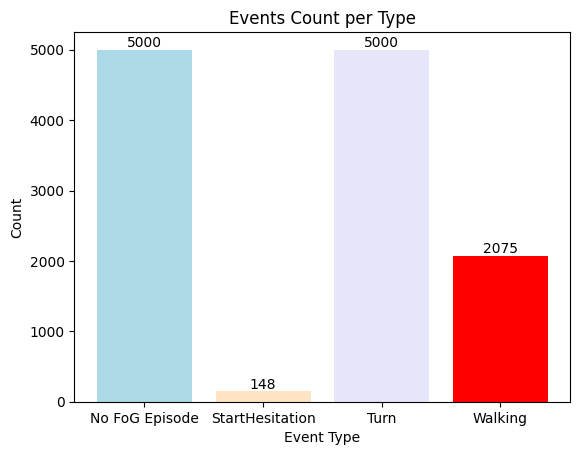

In [ ]:
# Count the occurrences of each class
all_zeros = ((df_subset['StartHesitation'] == 0) & (df_subset['Turn'] == 0) & (df_subset['Walking'] == 0)).sum()
start_hesitation_ones = (df_subset['StartHesitation'] == 1).sum()
turn_ones = (df_subset['Turn'] == 1).sum()
walking_ones = (df_subset['Walking'] == 1).sum()

# Create the bar plot
plt.bar(['No FoG Episode', 'StartHesitation', 'Turn', 'Walking'],
        [all_zeros, start_hesitation_ones, turn_ones, walking_ones],
        color=['lightblue', 'bisque', 'lavender', 'red'])

plt.xlabel("Event Type")
plt.ylabel("Count")
plt.title("Events Count per Type")

# Add value labels to the bars
for i, count in enumerate([all_zeros, start_hesitation_ones, turn_ones, walking_ones]):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [ ]:
import torch
import time
import torch.nn as nn
import time
import numpy as np
import matplotlib.pyplot as plt
import statistics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import mean_absolute_error
torch.manual_seed(17)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print("CUDA is available")
    print("PyTorch version:", torch.__version__)
    print("CUDA version:", torch.version.cuda)
    print("cuDNN version:", torch.backends.cudnn.version())
else:
    print("CUDA is not available")


CUDA is available
PyTorch version: 2.0.1+cu118
CUDA version: 11.8
cuDNN version: 8700


In [ ]:
def test_network(network, test_loader,  loss_function, device = "cpu", pretrained = False):
    # initialize the hidden state

    with torch.no_grad():

        batch_losses = []
        batch_predictions = []
        for x, y in test_loader:
            x = x.to(device)
            y = y.to(device)

            if(pretrained):
              pred = network(x.permute(0, 3, 1, 2))['out']
            else:
              pred = network(x)#.permute(0, 3, 1, 2))
            #pred_classes = F.log_softmax(predictions, dim=1).argmax(dim=1)

            #batch_predictions.append(torch.flatten(pred_classes).detach().numpy())
            #batch_predictions.append(predictions)
            if(pretrained):
              batch_losses.append(loss_function(pred['out'], y.unsqueeze(1)).detach().cpu())
            else:
              batch_losses.append(loss_function(pred, y).detach().cpu())#.unsqueeze(1)).detach().cpu())


            #batch_losses.append(loss_function(predictions, y.unsqueeze(1)).item())

        return np.mean(batch_losses), batch_predictions

def train_network(network, train_loader, val_loader,  loss_function, optimizer, epochs, save_path, patience = 10, device = "cpu", pretrained = False):
    # initialize the hidden state
    hidden = None
    network.train()
    best_val_loss = float("inf")
    early_stopping_counter = 0
    total_train_loss = []
    total_val_loss = []
    for epoch in range(epochs):
        train_batch_losses = []
        batch_index = 0
        start = time.time()

        for x, y in train_loader:
            # Move the inputs and labels to GPU
            x = x.to(device)
            y = y.to(device)
            if(pretrained):
              pred = network(x.permute(0, 3, 1, 2))['out']
            else:
              pred = network(x)#.permute(0, 3, 1, 2))

            #print(pred, y)
            loss = loss_function(pred, y)#.unsqueeze(1))
            train_batch_losses.append(loss.detach().cpu())


            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        train_loss = np.mean(train_batch_losses)
        total_train_loss.append(train_loss)
        val_loss, _ = test_network(network, val_loader, loss_function, device, pretrained = pretrained)
        total_val_loss.append(val_loss)

        if(val_loss<best_val_loss):
            best_val_loss = val_loss
            early_stopping_counter = 0
            torch.save(network.state_dict(), save_path)

        else:
            early_stopping_counter+=1
            if(early_stopping_counter == patience):
                print("No improvement on validation loss, training procedure stops")
                break
        print("End of Epoch, training loss: ", train_loss)
        print("End of Epoch, validation loss: ", val_loss)
        #print(time.time() - start)

    plt.plot(total_train_loss)
    plt.plot(total_val_loss)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(['Train', 'Validation'], loc='best')
    plt.title("LSTM train and validation loss")
    plt.show()

def inference(model, data_loader, threshold = 0.5):

  col = 0
  row = 0
  counter=0
  # Iterate over the val_loader
  model.eval()
  counter = 0
  accuracies = []
  predictions = []
  ground_truth = []
  binary_predictions = []
  for images, labels in data_loader:
      # Move the images and labels to the device

      images = images.to(device)
      labels = labels.to(device)


      output = model(images)#.permute(0, 3, 1, 2))

      binary_output = torch.where(output > threshold, torch.tensor(1), torch.tensor(0))

      #bin_pred = [1 if item > threshold else 0 for item in output]

      binary_predictions.append(binary_output)#.unsqueeze(0))
      # print(output.unsqueeze(0).shape)
      # print(labels.shape)

      predictions.append(output.unsqueeze(0))
      ground_truth.append(labels)
      # Calculate the evaluation metrics

    # Convert the lists to tensors

  ground_truth_tensor = torch.cat(ground_truth, dim=0)
  predictions_tensor = torch.cat(predictions, dim=0)
  binary_predictions_tensor = torch.cat(binary_predictions, dim=0)
  # print(np.unique(binary_predictions_tensor.cpu()))
  # print(np.unique(ground_truth_tensor.cpu()))

  # print(ground_truth_tensor.shape)
  # print(predictions_tensor.shape)


  mse = nn.MSELoss()(predictions_tensor, ground_truth_tensor)
  mae = nn.L1Loss()(predictions_tensor, ground_truth_tensor)
  rmse = torch.sqrt(mse)
  r_squared = 1 - (mse / torch.var(ground_truth_tensor))


  # Print the evaluation metrics
  print(f"MSE: {mse.item()}")
  print(f"MAE: {mae.item()}")
  print(f"RMSE: {rmse.item()}")
  #print(f"R-squared: {r_squared.item()}")



  accuracy = accuracy_score(binary_predictions_tensor.cpu(), ground_truth_tensor.cpu())
  #f1 = f1_score(binary_predictions_tensor.cpu(), ground_truth_tensor.cpu())

  print("Accuracy:", accuracy)

  print("\n")

  # Calculate precision
  precision = precision_score(binary_predictions_tensor.cpu(), ground_truth_tensor.cpu(), average = 'micro')
  print("Precision - Micro:", precision)

  # Calculate precision
  precision = precision_score(binary_predictions_tensor.cpu(), ground_truth_tensor.cpu(), average = 'macro')
  print("Precision - Macro:", precision)

  print("\n")
  # Calculate recall
  recall = recall_score(binary_predictions_tensor.cpu(), ground_truth_tensor.cpu(), average = 'micro')
  print("Recall - Micro:", recall)


  # Calculate recall
  recall = recall_score(binary_predictions_tensor.cpu(), ground_truth_tensor.cpu(), average = 'macro')
  print("Recall - Macro:", recall)

  print("\n")

  # Calculate F1 score
  f1 = f1_score(binary_predictions_tensor.cpu(), ground_truth_tensor.cpu(), average = 'micro')
  print("F1 Score - Micro:", f1)

  # Calculate F1 score
  f1 = f1_score(binary_predictions_tensor.cpu(), ground_truth_tensor.cpu(), average = 'macro')
  print("F1 Score - Macro:", f1)

  print("\n")

  #print("F1 Score:", f1)

  # y_pred = y_pred.tolist()
  # # Evaluate the model
  # mse = mean_squared_error(y_test, y_pred)
  # print("Mean Squared Error:", mse)
  # print("\n")

  # rmse = np.sqrt(mse)

  # print("Root Mean Squared Error:", rmse)
  # print("\n")

  # mae = mean_absolute_error(y_test, y_pred)
  # print("Mean Absolute Error:", mae)
  # print("\n")


  # threshold = 0.5
  # binarized_predictions = [[1 if pred >= threshold else 0 for pred in sublist] for sublist in y_pred]




In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
#from lightgbm LGBMMultiOutputRegressor
from sklearn.multioutput import MultiOutputRegressor
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim



class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, hidden_layers, output_dim, dropout, bidirectional=False):
        super(LSTMClassifier, self).__init__()
        self.bidirectional = bidirectional
        self.feature_size = hidden_dim * 2 if self.bidirectional else hidden_dim

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.hidden_layers = hidden_layers
        self.output_dim = output_dim

        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.hidden_layers, dropout=dropout, bidirectional=bidirectional, batch_first=True)
        self.linear1 = nn.Linear(self.feature_size, self.hidden_dim)  # First linear layer
        self.linear2 = nn.Linear(self.hidden_dim, self.output_dim)  # Second linear layer
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        lstm_out, _ = self.lstm(x)

        # _, (h_n, _) = self.lstm(x)
        #output = self.linear(h_n[-1])  # Use the hidden state of the last timestep

        # # Take the last output of the LSTM sequence
        #last_output = lstm_out[-1, :]

        # Apply first linear layer
        linear1_out = self.linear1(lstm_out)

        # Apply ReLU activation function
        relu_out = self.relu(linear1_out)

        # Apply second linear layer
        linear2_out = self.linear2(relu_out)

        # Apply sigmoid activation function
        output = self.sigmoid(linear2_out)

        return output

    def last_timestep(self, outputs):
        return outputs[:, -1, :]


APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
_PyDriveImportHook.find_spec() not found; falling back to find_module()
_OpenCVImportHook.find_spec() not found; falling back to find_module()
_BokehImportHook.find_spec() not found; falling back to find_module()
_AltairImportHook.find_spec() not found; falling back to find_module()
APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
_PyDriveImportHook.find_spec() not found; falling back to find_module()
_OpenCVImportHook.find_spec() not found; falling back to find_module()
_BokehImportHook.find_spec() not found; falling back to find_module()
_AltairImportHook.find_spec() not found; falling back to find_module()
APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
_PyDriveImportHook.find_spec() not found; falling back to find_module()
_OpenCVImportHook.find_spec() not found; falling back to find_module()
_BokehImportHook.find_spec() not found; fallin

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
#from lightgbm LGBMMultiOutputRegressor
from sklearn.multioutput import MultiOutputRegressor
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim


# Define the LSTM feature extractor
class LSTMRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim, hidden_layers, output_dim, dropout, bidirectional=False):
        super(LSTMRegressor, self).__init__()
        self.bidirectional = bidirectional
        self.feature_size = hidden_dim * 2 if self.bidirectional else hidden_dim

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.hidden_layers = hidden_layers
        self.output_dim = output_dim

        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.hidden_layers, dropout=dropout, bidirectional=bidirectional, batch_first=True)
        self.linear = nn.Linear(hidden_dim, output_dim)

        #self.linear_layers = nn.ModuleList([nn.Linear(hidden_dim, 1) for _ in range(output_dim)])
        self.sigmoid = nn.Sigmoid()

    # def forward(self, x):
    #   _, (h_n, _) = self.lstm(x)
    #   outputs = [linear_layer(h_n.squeeze(0)) for linear_layer in self.linear_layers]
    #   return torch.cat(outputs, dim=1)

    def forward(self, x):

        #_, (h_n, _) = self.lstm(x)
        #output = self.linear(h_n[-1])  # Use the hidden state of the last timestep

        # # Take the last output of the LSTM sequence
        #last_output = lstm_out[-1, :]

        # Apply first linear layer
        #linear1_out = self.linear1(h_n[-1])



        #lstm_out, _ = self.lstm(h_n[-1])

        lstm_out, _ = self.lstm(x)

        # _, (h_n, _) = self.lstm(x)
        #output = self.linear(h_n[-1])  # Use the hidden state of the last timestep

        # # Take the last output of the LSTM sequence
        #last_output = lstm_out[-1, :]

        # Apply linear layer
        linear_out = self.linear(lstm_out)

        # Apply sigmoid activation function
        output = self.sigmoid(linear_out)

        return output

        _, (h_n, _) = self.lstm(x)
        output = self.linear(h_n[-1])  # Use the hidden state of the last timestep
        return output

        x, _ = self.lstm(x)

        return self.last_timestep(x)

    def last_timestep(self, outputs):
        return outputs[:, -1, :]


In [ ]:


# Generate some example data
# input_dim = 10  # Dimension of input features
# output_dim = 5  # Number of regression outputs
# sequence_length = 100  # Length of input sequences
# num_samples = 1000  # Number of training samples

# # Create random input sequences and corresponding targets
# input_data = np.random.randn(num_samples, sequence_length, input_dim)
# targets = np.random.randn(num_samples, output_dim)

# # Split the data into training and testing sets
# input_train, input_test, targets_train, targets_test = train_test_split(input_data, targets, test_size=0.2, random_state=42)

# # Scale the input data
# scaler = StandardScaler()
# input_train_scaled = scaler.fit_transform(input_train.reshape(-1, input_dim)).reshape(input_train.shape)
# input_test_scaled = scaler.transform(input_test.reshape(-1, input_dim)).reshape(input_test.shape)

# # Convert the data to PyTorch tensors
# input_train_tensor = torch.Tensor(input_train_scaled)
# input_test_tensor = torch.Tensor(input_test_scaled)
# targets_train_tensor = torch.Tensor(targets_train)
# targets_test_tensor = torch.Tensor(targets_test)

# train_data_tensor = TensorDataset(input_train_tensor, targets_train_tensor)
# val_data_tensor = TensorDataset(input_train_tensor, targets_train_tensor)
# test_data_tensor = TensorDataset(input_test_tensor, targets_test_tensor)


# # Create DataLoader
# train_loader = DataLoader(train_data_tensor, batch_size=32, shuffle=True)
# val_loader = DataLoader(val_data_tensor, batch_size=32, shuffle=True)
# test_batch_size = 1
# test_loader = DataLoader(test_data_tensor, batch_size=test_batch_size, shuffle=False)

# output_dim = 5
# lstm_extractor = LSTMFeatureExtractor(input_dim, hidden_dim=64, hidden_layers=2, output_dim=output_dim, dropout=0.2, bidirectional=False)

# criterion = nn.MSELoss()
# optimizer = optim.Adam(lstm_extractor.parameters(), lr=0.00005)
# epochs = 150
# save_path = "lstm.pth"
# model = lstm_extractor.to(device)

# train_network(model, train_loader, val_loader,  criterion, optimizer, epochs, save_path, patience = 10, device = device, pretrained = False)

# inference(model, test_loader)

# Create an instance of LSTMFeatureExtractor

# Extract features using the LSTM feature extractor
# features_train = lstm_extractor(input_train_tensor)
# features_test = lstm_extractor(input_test_tensor)

# # Convert the extracted features to NumPy arrays
# features_train_np = features_train.detach().numpy()
# features_test_np = features_test.detach().numpy()




# # # Create an instance of LGBMRegressor for multi-output regression
# # multioutput_regressor = MultiOutputRegressor(Ridge(random_state=123))


# # Create an instance of LGBMRegressor
# lgbm_regressor = LGBMRegressor()

# # Create an instance of MultiOutputRegressor with the LSTM feature extractor and LGBMRegressor
# multioutput_regressor = MultiOutputRegressor(lgbm_regressor)

# # Flatten the targets
# # features_train_flat = features_train_np.reshape(-1)
# # targets_train_flat = targets_train.reshape(-1)

# # features_test_flat = features_test_np.reshape(-1)
# # features_test_flat = targets_test.reshape(-1)

# # print(targets_train.shape)
# # targets_train_flat = targets_train.reshape(-1)
# # print(targets_train_flat.shape)

# # Train the LGBMRegressor on the extracted features
# #multioutput_regressor.fit(features_train_np, targets_train)

# multioutput_regressor.fit(features_train_np, targets_train)

# # Predict using the trained model
# predictions = multioutput_regressor.predict(features_test_np)

# # Calculate the mean squared error (MSE)
# mse = np.mean((predictions - targets_test) ** 2)
# print("Mean Squared Error (MSE):", mse)

End of Epoch, training loss:  0.6407241
End of Epoch, validation loss:  0.6455614
End of Epoch, training loss:  0.6405859
End of Epoch, validation loss:  0.64874905
End of Epoch, training loss:  0.63989407
End of Epoch, validation loss:  0.6406259
End of Epoch, training loss:  0.63989997
End of Epoch, validation loss:  0.6479203
End of Epoch, training loss:  0.6395335
End of Epoch, validation loss:  0.6435718
End of Epoch, training loss:  0.63831675
End of Epoch, validation loss:  0.64288455
End of Epoch, training loss:  0.6381244
End of Epoch, validation loss:  0.63463026
End of Epoch, training loss:  0.63681245
End of Epoch, validation loss:  0.6456752
End of Epoch, training loss:  0.63675714
End of Epoch, validation loss:  0.6411534
End of Epoch, training loss:  0.6359654
End of Epoch, validation loss:  0.63667035
End of Epoch, training loss:  0.634551
End of Epoch, validation loss:  0.636035
End of Epoch, training loss:  0.6348078
End of Epoch, validation loss:  0.6388052
End of Ep

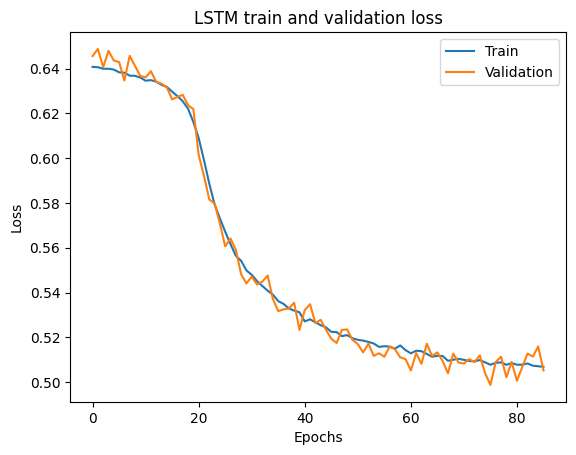

MSE: 0.22410064935684204
MAE: 0.4684743881225586
RMSE: 0.47339269518852234
Accuracy: 0.4134969325153374


Precision - Micro: 0.6991701244813278
Precision - Macro: 0.3333333333333333


Recall - Micro: 0.4134969325153374
Recall - Macro: 0.1378323108384458


F1 Score - Micro: 0.5196607555898226
F1 Score - Macro: 0.19502314814814814




/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([2445, 3])) that is different to the input size (torch.Size([2445, 1, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([2445, 3])) that is different to the input size (torch.Size([2445, 1, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Convert the data to PyTorch tensors
input_train_tensor = torch.Tensor(X_train.values)
input_test_tensor = torch.Tensor(X_test.values)
input_val_tensor = torch.Tensor(X_val.values)

targets_train_tensor = torch.Tensor(y_train)
targets_test_tensor = torch.Tensor(y_test)
targets_val_tensor = torch.Tensor(y_val)

train_data_tensor = TensorDataset(input_train_tensor, targets_train_tensor)
test_data_tensor = TensorDataset(input_test_tensor, targets_test_tensor)
val_data_tensor = TensorDataset(input_val_tensor, targets_val_tensor)


# Create DataLoader
train_loader = DataLoader(train_data_tensor, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data_tensor, batch_size=32, shuffle=True)

test_batch_size = 1
test_loader = DataLoader(test_data_tensor, batch_size=test_batch_size, shuffle=False)

input_dim = 3
output_dim = 3
lstm_extractor = LSTMClassifier(input_dim, hidden_dim=128, hidden_layers=3, output_dim=output_dim, dropout=0.0, bidirectional=False)

criterion = nn.CrossEntropyLoss()
#criterion = nn.MSELoss()

#criterion = nn.MSELoss()
optimizer = optim.Adam(lstm_extractor.parameters(), lr=0.000001)
epochs = 500
save_path = "lstm_cl.pth"
model_cl = lstm_extractor.to(device)

train_network(model_cl, train_loader, val_loader,  criterion, optimizer, epochs, save_path, patience = 10, device = device, pretrained = False)

inference(model_cl, test_loader)

End of Epoch, training loss:  0.24945958
End of Epoch, validation loss:  0.24925905
End of Epoch, training loss:  0.24912384
End of Epoch, validation loss:  0.24893972
End of Epoch, training loss:  0.2487906
End of Epoch, validation loss:  0.2485837
End of Epoch, training loss:  0.24844249
End of Epoch, validation loss:  0.24828148
End of Epoch, training loss:  0.24810758
End of Epoch, validation loss:  0.24791093
End of Epoch, training loss:  0.24776775
End of Epoch, validation loss:  0.24763198
End of Epoch, training loss:  0.24746026
End of Epoch, validation loss:  0.24721377
End of Epoch, training loss:  0.24707165
End of Epoch, validation loss:  0.24689594
End of Epoch, training loss:  0.24674122
End of Epoch, validation loss:  0.24657506
End of Epoch, training loss:  0.24639402
End of Epoch, validation loss:  0.24623007
End of Epoch, training loss:  0.2460034
End of Epoch, validation loss:  0.24581623
End of Epoch, training loss:  0.24563758
End of Epoch, validation loss:  0.2454

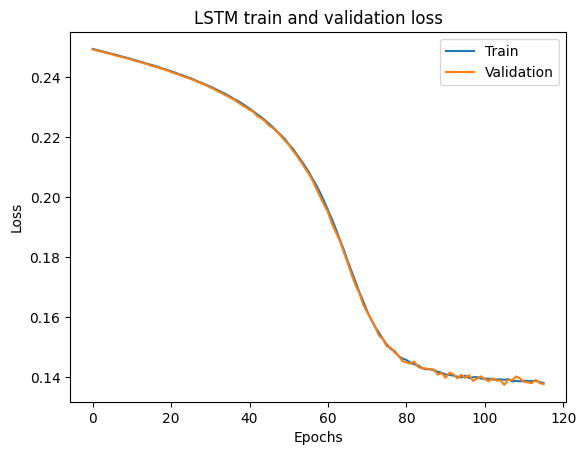

MSE: 0.24322672188282013
MAE: 0.4931223690509796
RMSE: 0.49318021535873413
Accuracy: 0.4085889570552147


Precision - Micro: 0.0
Precision - Macro: 0.0


Recall - Micro: 0.0
Recall - Macro: 0.0


F1 Score - Micro: 0.0
F1 Score - Macro: 0.0




/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([2445, 3])) that is different to the input size (torch.Size([2445, 1, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([2445, 3])) that is different to the input size (torch.Size([2445, 1, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/loc

In [ ]:
# Convert the data to PyTorch tensors
input_train_tensor = torch.Tensor(X_train.values)
input_test_tensor = torch.Tensor(X_test.values)
input_val_tensor = torch.Tensor(X_val.values)

targets_train_tensor = torch.Tensor(y_train)
targets_test_tensor = torch.Tensor(y_test)
targets_val_tensor = torch.Tensor(y_val)

train_data_tensor = TensorDataset(input_train_tensor, targets_train_tensor)
test_data_tensor = TensorDataset(input_test_tensor, targets_test_tensor)
val_data_tensor = TensorDataset(input_val_tensor, targets_val_tensor)


# Create DataLoader
train_loader = DataLoader(train_data_tensor, batch_size=128, shuffle=True)
val_loader = DataLoader(val_data_tensor, batch_size=128, shuffle=True)

test_batch_size = 1
test_loader = DataLoader(test_data_tensor, batch_size=test_batch_size, shuffle=False)

input_dim = 3
output_dim = 3
lstm_extractor = LSTMRegressor(input_dim, hidden_dim=128, hidden_layers=3, output_dim=output_dim, dropout=0.0, bidirectional=False)

#loss = nn.CrossEntropyLoss()
criterion = nn.MSELoss()

#criterion = nn.MSELoss()
optimizer = optim.Adam(lstm_extractor.parameters(), lr=0.000001)
epochs = 250
save_path = "lstm_reg.pth"
model_reg = lstm_extractor.to(device)

train_network(model_reg, train_loader, val_loader,  criterion, optimizer, epochs, save_path, patience = 10, device = device, pretrained = False)

inference(model_reg, test_loader)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score
import itertools
from sklearn.metrics import mean_absolute_error

# Split the data into train and test sets

n_estim = [100, 300 ,500]

max_depth = [3, 5, 10]

for estimators, depth in itertools.product(n_estim, max_depth):
  print("---------------------------------------------------------------")
  print("Number of estimators:", estimators, ", Max depth:", depth)



  # Define the XGBoost model
  model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=estimators, max_depth=depth)
  # Train the model
  model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  y_pred = y_pred.tolist()
  # Evaluate the model
  mse = mean_squared_error(y_test, y_pred)
  print("Mean Squared Error:", mse)
  print("\n")

  rmse = np.sqrt(mse)

  print("Root Mean Squared Error:", rmse)
  print("\n")

  mae = mean_absolute_error(y_test, y_pred)
  print("Mean Absolute Error:", mae)
  print("\n")


  threshold = 0.5
  binarized_predictions = [[1 if pred >= threshold else 0 for pred in sublist] for sublist in y_pred]


  # Assuming `true_labels` and `predicted_labels` are your true and predicted labels respectively
  accuracy = accuracy_score(binarized_predictions, y_test)
  #f1 = f1_score(binary_predictions_tensor.cpu(), ground_truth_tensor.cpu())

  print("Accuracy:", accuracy)

  print("\n")

  # Calculate precision
  precision = precision_score(binarized_predictions, y_test, average = 'micro')
  print("Precision - Micro:", precision)

  # Calculate precision
  precision = precision_score(binarized_predictions, y_test, average = 'macro')
  print("Precision - Macro:", precision)

  print("\n")
  # Calculate recall
  recall = recall_score(binarized_predictions, y_test, average = 'micro')
  print("Recall - Micro:", recall)


  # Calculate recall
  recall = recall_score(binarized_predictions, y_test, average = 'macro')
  print("Recall - Macro:", recall)

  print("\n")

  # Calculate F1 score
  f1 = f1_score(binarized_predictions, y_test, average = 'micro')
  print("F1 Score - Micro:", f1)

  # Calculate F1 score
  f1 = f1_score(binarized_predictions, y_test, average = 'macro')
  print("F1 Score - Macro:", f1)
  print("---------------------------------------------------------------")

  print("\n")


---------------------------------------------------------------
Number of estimators: 100 , Max depth: 3
Mean Squared Error: 0.08141579473110504


Root Mean Squared Error: 0.28533453126305103


Mean Absolute Error: 0.16634527528748877


Accuracy: 0.6965235173824131


Precision - Micro: 0.603042876901798
Precision - Macro: 0.39333669300145657


Recall - Micro: 0.7792672028596962
Recall - Macro: 0.7255282461389331


F1 Score - Micro: 0.6799220272904484
F1 Score - Macro: 0.47108725763499937
---------------------------------------------------------------


---------------------------------------------------------------
Number of estimators: 100 , Max depth: 5
Mean Squared Error: 0.07867665486301693


Root Mean Squared Error: 0.280493591482973


Mean Absolute Error: 0.15628170712447675


Accuracy: 0.7186094069529653


Precision - Micro: 0.6445366528354081
Precision - Macro: 0.4933107129591372


Recall - Micro: 0.768976897689769
Recall - Macro: 0.6834109907818223


F1 Score - Micro: 0.701279

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score
import itertools
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

# Split the data into train and test sets

rounds = [30, 50 ,100]

max_depth = [3, 5, 10, 15 ,20]

# Convert your data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

for rounds, depth in itertools.product(rounds, max_depth):
  print("---------------------------------------------------------------")
  print("Max depth:", depth, "Number of rounds:", rounds)


  # Set the XGBoost parameters for binary classification
  params = {
      'objective': 'binary:logistic',    # Binary classification with logistic regression
      'eval_metric': 'error',            # Classification error evaluation metric
      #'num_boosting_rounds': estimators,                # Number of trees in the ensemble
      'max_depth': depth
  }

  # Train the XGBoost model
  num_rounds = 100
  model = xgb.train(params, dtrain, rounds)

  y_pred = model.predict(dtest)
  # Convert predicted probabilities to zeros and ones
  threshold = 0.5
  binarized_predictions = np.round(y_pred).astype(int)


  # Calculate accuracy on the validation set
  accuracy = accuracy_score(y_test, binarized_predictions)


  print("Accuracy:", accuracy)

  print("\n")

  # Calculate precision
  precision = precision_score(binarized_predictions, y_test, average = 'micro')
  print("Precision - Micro:", precision)

  # Calculate precision
  precision = precision_score(binarized_predictions, y_test, average = 'macro')
  print("Precision - Macro:", precision)

  print("\n")
  # Calculate recall
  recall = recall_score(binarized_predictions, y_test, average = 'micro')
  print("Recall - Micro:", recall)


  # Calculate recall
  recall = recall_score(binarized_predictions, y_test, average = 'macro')
  print("Recall - Macro:", recall)

  print("\n")

  # Calculate F1 score
  f1 = f1_score(binarized_predictions, y_test, average = 'micro')
  print("F1 Score - Micro:", f1)

  # Calculate F1 score
  f1 = f1_score(binarized_predictions, y_test, average = 'macro')
  print("F1 Score - Macro:", f1)
  print("---------------------------------------------------------------")

  print("\n")


---------------------------------------------------------------
Max depth: 3 Number of rounds: 30
Accuracy: 0.6850715746421268


Precision - Micro: 0.5816044260027663
Precision - Macro: 0.3505871072214084


Recall - Micro: 0.771559633027523
Recall - Macro: 0.8154638115044449


F1 Score - Micro: 0.663249211356467
F1 Score - Macro: 0.40917003382591943
---------------------------------------------------------------


---------------------------------------------------------------
Max depth: 5 Number of rounds: 30
Accuracy: 0.7014314928425358


Precision - Micro: 0.6230982019363762
Precision - Macro: 0.4539371762928462


Recall - Micro: 0.7681159420289855
Recall - Macro: 0.6964244232137787


F1 Score - Micro: 0.688048873615884
F1 Score - Macro: 0.5330511539559577
---------------------------------------------------------------


---------------------------------------------------------------
Max depth: 10 Number of rounds: 30
Accuracy: 0.7165644171779141


Precision - Micro: 0.6694329183955

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import itertools
from sklearn.metrics import mean_absolute_error
import numpy as np
# Split the data into train and test sets


# Define the XGBoost model
model_xgboost = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=10)
# Train the model
model_xgboost.fit(X_train, y_train)

# Set the XGBoost parameters for binary classification
params = {
    'objective': 'binary:logistic',    # Binary classification with logistic regression
    'eval_metric': 'error',            # Classification error evaluation metric
    #'num_boosting_rounds': estimators,                # Number of trees in the ensemble
    'max_depth': depth
}

# Train the XGBoost model
num_rounds = 100
model_xgboost_cl = xgb.train(params, dtrain, num_rounds)


input_dim = 3
output_dim = 3
model_reg = LSTMRegressor(input_dim, hidden_dim=128, hidden_layers=3, output_dim=output_dim, dropout=0.0, bidirectional=False)

# Load the trained model weights
model_reg.load_state_dict(torch.load('lstm_reg.pth'))

model_cl = LSTMClassifier(input_dim, hidden_dim=128, hidden_layers=3, output_dim=output_dim, dropout=0.0, bidirectional=False)

# Load the trained model weights
model_cl.load_state_dict(torch.load('lstm_cl.pth'))

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# y_pred = y_pred.tolist()

# print("\n")

<All keys matched successfully>

In [ ]:
!pip install shap
import shap

# print the JS visualization code to the notebook
shap.initjs()



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.6 MB/s eta 0:00:00


<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:85: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/shap-0.41.0.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:85: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/loca

In [ ]:
!pip install --upgrade shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 25.0 MB/s eta 0:00:00


<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:85: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/shap-0.41.0.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:85: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/loca

In [ ]:
import warnings
warnings.filterwarnings("default")


# explainer_lstm_cl = shap.KernelExplainer(model = model_cl, data = train_loader, link = "identity")
# explainer_lstm_reg = shap.Explainer(model_reg, model_reg.forward)

# Convert input data to NumPy array
X_train_array = X_train.to_numpy(dtype=np.float32)

# Convert input data to PyTorch tensor
X_train_tensor = torch.tensor(X_train_array[:500], dtype=torch.float32)

# Convert input data to PyTorch tensor
X_train_tensor_single = torch.tensor(X_train_array[0], dtype=torch.float32).unsqueeze(0)


# Calculate SHAP values
explainer_xgboost_cl = shap.TreeExplainer(model_xgboost_cl)

shap_values_xgboost_cl = explainer_xgboost_cl.shap_values(dtrain)

explainer_xgboost = shap.KernelExplainer(model = model_xgboost.predict, data = X_train.head(50), link = "identity")
explainer_lstm_cl = shap.DeepExplainer(model_cl, X_train_tensor)
explainer_lstm_reg = shap.DeepExplainer(model_reg, X_train_tensor)

# Compute SHAP values for the input data
shap_values_cl = explainer_lstm_cl.shap_values(X_train_tensor)

# Compute SHAP values for the input data
shap_values_reg = explainer_lstm_reg.shap_values(X_train_tensor)


# Compute SHAP values for the input data
shap_values_xgboost = explainer_xgboost.shap_values(X_train_array[:500])




#explainer_lstm_cl = shap.KernelExplainer(model = model_cl, data = X_train.head(50), link = "identity")
# explainer_lstm_ref = shap.KernelExplainer(model = model_reg.predict, data = X_train.head(50), link = "identity")

# Set the index of the specific example to explain
X_idx = 0

shap_value_single_xgboost_cl = explainer_xgboost_cl.shap_values(X= X_train.iloc[X_idx:X_idx+1,:])
shap_value_single_xgboost = explainer_xgboost.shap_values(X= X_train.iloc[X_idx:X_idx+1,:], nsamples = 100)
shap_value_single_lstm_cl = explainer_lstm_cl.shap_values(X= X_train_tensor_single)
shap_value_single_lstm_reg = explainer_lstm_reg.shap_values(X= X_train_tensor_single)

X_train.iloc[X_idx:X_idx+1,:]


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

KeyboardInterrupt: ignored

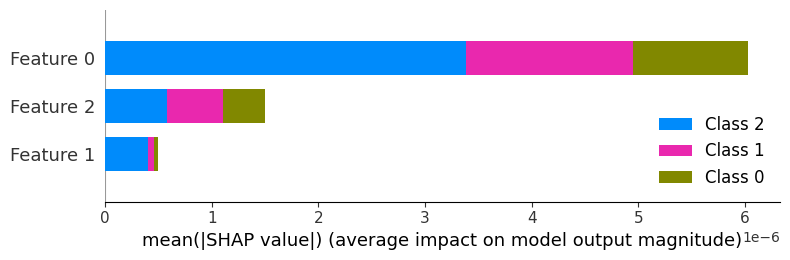

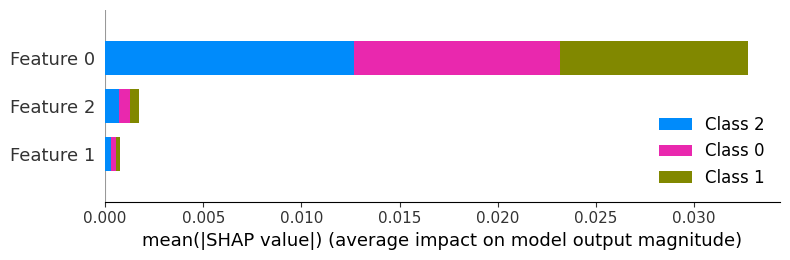

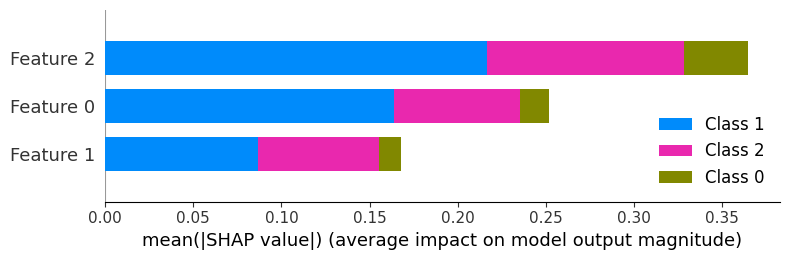

In [ ]:
# Visualize the SHAP values
shap.summary_plot(shap_values_cl, X_train_tensor)

# Visualize the SHAP values
shap.summary_plot(shap_values_reg, X_train_tensor)

# Visualize the SHAP values
shap.summary_plot(shap_values_xgboost, X_train_tensor)


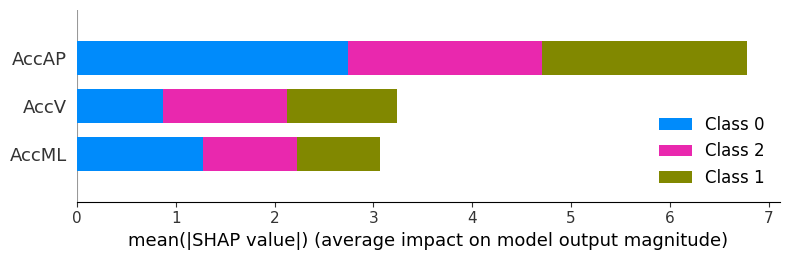

In [ ]:
# Visualize the SHAP values
shap.summary_plot(shap_values_xgboost_cl, X_train, plot_type="bar")

In [ ]:
import ipywidgets as widgets
# Create the list of all labels for the drop down list
list_of_labels = y_train

# Create a list of tuples so that the index of the label is what is returned
tuple_of_labels = list(zip(list_of_labels, range(len(list_of_labels))))

# Create a widget for the labels and then display the widget
current_label = widgets.Dropdown(options=tuple_of_labels,
                              value=0,
                              description='Select Label:'
                              )

# Display the dropdown list (Note: access index value with 'current_label.value')
current_label

Dropdown(description='Select Label:', options=(([0, 0, 1], 0), ([0, 1, 0], 1), ([0, 0, 0], 2), ([0, 1, 0], 3),…

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()

print(f'Current label Shown: {list_of_labels[current_label.value]}')

shap.force_plot(base_value = explainer_xgboost.expected_value[current_label.value],
                shap_values = shap_value_single_xgboost[current_label.value],
                features = X_train.iloc[X_idx:X_idx+1,:]
                )


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Current label Shown: [0, 0, 1]


In [ ]:
print(f'Current label Shown: {list_of_labels[current_label.value]}')

shap.force_plot(base_value = explainer_lstm_cl.expected_value[current_label.value],
                shap_values = shap_value_single_lstm_cl[current_label.value],
                features = X_train_tensor_single[:,:]
                )

Current label Shown: [0, 0, 1]


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Exception: ignored

In [ ]:
shap.force_plot(base_value = explainer_lstm_reg.expected_value[current_label.value],
                shap_values = shap_value_single_lstm_reg[current_label.value],
                features = X_train.iloc[X_idx:X_idx+1,:]
                )

In [ ]:
# Note: We are limiting to the first 50 training examples since it takes time to calculate the full number of sampels
shap_values_xgboost = explainer_xgboost.shap_values(X = X_train.iloc[:,:], nsamples = 100)
# Note: We are limiting to the first 50 training examples since it takes time to calculate the full number of sampels
shap_values_cl = explainer_lstm_cl.shap_values(X = X_train.iloc[:,:], nsamples = 100)
# Note: We are limiting to the first 50 training examples since it takes time to calculate the full number of sampels
shap_values_reg = explainer_lstm_reg.shap_values(X = X_train.iloc[:,:], nsamples = 100)

  0%|          | 0/7822 [00:00<?, ?it/s]

Current Label Shown: [0, 0, 1]



AssertionError: ignored

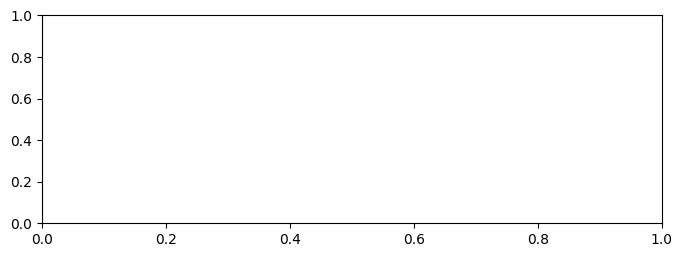

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()

print(f'Current Label Shown: {list_of_labels[current_label.value]}\n')

shap.summary_plot(shap_values = shap_values_xgboost[current_label.value],
                  features = X_train.iloc[:,:]
                  )


In [ ]:
# print the JS visualization code to the notebook
shap.initjs()

print(f'Current Label Shown: {list_of_labels[current_label.value]}\n')

shap.summary_plot(shap_values = shap_values_cl[current_label.value],
                  features = X_train.iloc[:,:]
                  )

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()

print(f'Current Label Shown: {list_of_labels[current_label.value]}\n')

shap.summary_plot(shap_values = shap_values_reg[current_label.value],
                  features = X_train.iloc[:,:]
                  )